In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape, test.shape

((891, 12), (418, 11))

In [ ]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##Visualization

* matplotlib
* seaborn

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train['Survived_label'] = train['Survived'].replace(0, 'Dead').replace(1, 'Survived')
train['Pclass_label'] = train['Pclass'].replace(1, 'First Class').replace(2,'Business Class').replace(3, 'Economy Class')

train[['Survived', 'Survived_label']]

,Survived,Survived_label
0,0,Dead
1,1,Survived
2,1,Survived
3,1,Survived
4,0,Dead
...,...,...
886,0,Dead
887,1,Survived
888,0,Dead
889,1,Survived


In [ ]:
train[['Pclass', 'Pclass_label']]

,Pclass,Pclass_label
0,3,Economy Class
1,1,First Class
2,3,Economy Class
3,1,First Class
4,3,Economy Class
...,...,...
886,2,Business Class
887,1,First Class
888,3,Economy Class
889,1,First Class


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


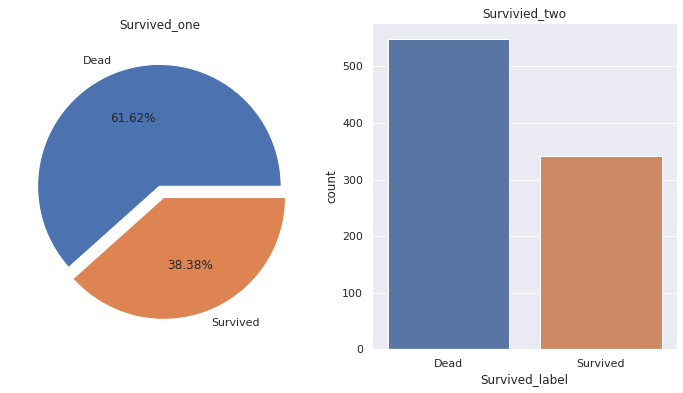

In [ ]:
f, ax = plt.subplots(1,2,figsize=(12, 6))

train['Survived_label'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])

ax[0].set_title('Survived_one')
ax[0].set_ylabel('')

sns.countplot('Survived_label', data=train, ax=ax[1])
ax[1].set_title('Survivied_two')
plt.show()

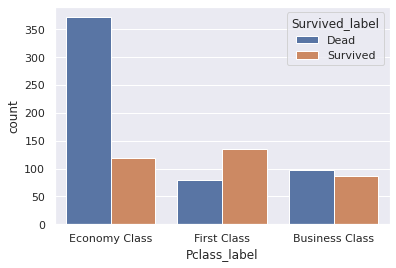

In [ ]:
sns.countplot(data=train, x='Pclass_label', hue='Survived_label')

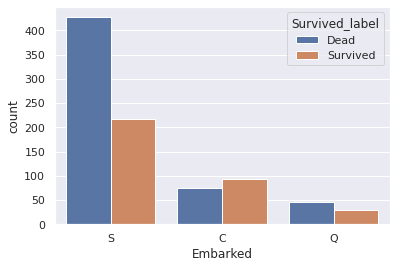

In [ ]:
sns.countplot(data=train, x='Embarked', hue='Survived_label')

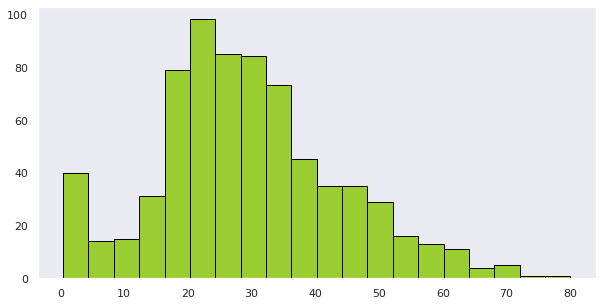

In [ ]:
train['Age'].hist(bins=20,
                  figsize=(10,5)
                  , grid=False,
                  edgecolor='black',
                  color='yellowgreen')

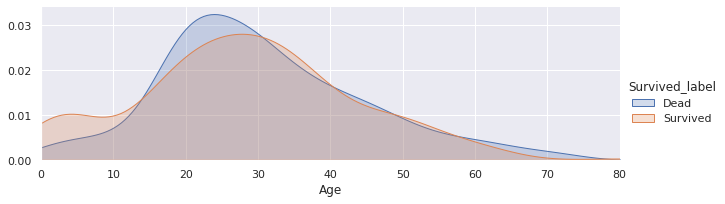

In [ ]:
f = sns.FacetGrid(train, hue='Survived_label', aspect=3)
f.map(sns.kdeplot, 'Age', shade=True)
f.set(xlim=(0, train['Age'].max()))
f.add_legend()

In [ ]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts() #boolean Indexing
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived, dead])
  df.index=['Survived', 'Dead']
  df.plot(kind='bar', stacked=True, figsize=(10,5))

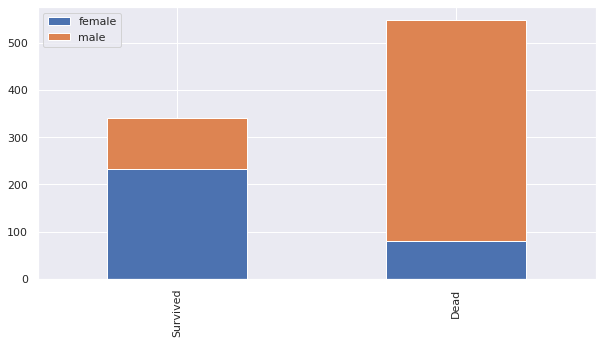

In [ ]:
bar_chart('Sex')

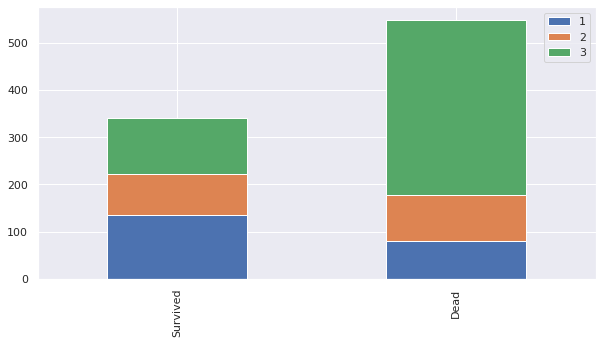

In [ ]:
bar_chart('Pclass')

In [ ]:
train_test_data =[train, test]
train_test_data

for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [ ]:
train['Title'].value_counts().sum()

891

In [ ]:
#title mapping
# Mr :0 
# Miss :1
# Mrs : 2
# Other : 3
title_mapping={'Mr' : 0,
              'Miss' : 1,
              'Mrs' : 2,
              'Master' : 3,
              'Dr' : 3,
              'Rev' : 3,
              'Col' : 3,
              'Mlle' : 3,
              'Major' : 3,
              'Ms' : 3,
              'Countess' :3,
              'Capt' :3,
              'Lady' : 3, 
              'Don' : 3,
              'Jonkheer' : 3,
              'Sir' : 3,
              'Mme' : 3 }

In [ ]:
for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_label,Pclass_label,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead,Economy Class,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Economy Class,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Dead,Economy Class,0


In [ ]:
train['Title'].value_counts().sum() #갯수 안맞으면 머신러닝 돌릴 때 에러 발생

891

In [ ]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_label,Pclass_label,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead,Economy Class,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Economy Class,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Dead,Economy Class,0


In [ ]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_label,Pclass_label,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead,Economy Class,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Economy Class,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Dead,Economy Class,0


In [ ]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Sex             891 non-null    int64  
 4   Age             891 non-null    float64
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Ticket          891 non-null    object 
 8   Fare            891 non-null    float64
 9   Cabin           204 non-null    object 
 10  Embarked        889 non-null    object 
 11  Survived_label  891 non-null    object 
 12  Pclass_label    891 non-null    object 
 13  Title           891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [ ]:
#Binning
for dataset in train_test_data:
  dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
  dataset.loc[(dataset['Age']) > 62, 'Age'] = 4

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_label,Pclass_label,Title
0,1,0,3,0,0.0,1,0,A/5 21171,7.2500,NaN,S,Dead,Economy Class,0
1,2,1,1,1,0.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,2
2,3,1,3,1,0.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Economy Class,1
3,4,1,1,1,0.0,1,0,113803,53.1000,C123,S,Survived,First Class,2
4,5,0,3,0,0.0,0,0,373450,8.0500,NaN,S,Dead,Economy Class,0


In [ ]:
#결측치 채우기
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
embarked_mapping = {'S' : 0, 'C' : 1, 'Q' : 2}
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Sex             891 non-null    int64  
 4   Age             891 non-null    float64
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Ticket          891 non-null    object 
 8   Fare            891 non-null    float64
 9   Cabin           204 non-null    object 
 10  Embarked        891 non-null    int64  
 11  Survived_label  891 non-null    object 
 12  Pclass_label    891 non-null    object 
 13  Title           891 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 97.6+ KB


In [ ]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [ ]:
#Binning
for dataset in train_test_data:
  dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
  dataset.loc[(dataset['Fare']) > 100, 'Fare'] = 3

In [ ]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
D28            1
D37            1
B102           1
D10 D12        1
D30            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'][:1]

In [ ]:
cabin_mapping = {'A' : 0,
                 'B' : 0.4,
                 'C' : 0.8,
                 'D' : 1.2,
                 'E' : 1.6,
                 'F' : 2,
                 'G' : 2.4,
                 'T' : 2.8
                 }

for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [ ]:
family_mapping = {1 : 0,
                  2 : 0.4,
                  3 : 0.8,
                  4 : 1.2,
                  5 : 1.6,
                  6 : 2.0,
                  7 : 2.4,
                  8 : 2.8,
                  9 : 3.2,
                  10 : 3.6,
                  11 : 4.0
                 }

for dataset in train_test_data:
  dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_label,Pclass_label,Title,FamilySize
0,1,0,3,0,0.0,1,0,A/5 21171,0.0,NaN,0,Dead,Economy Class,0,0.4
1,2,1,1,1,0.0,1,0,PC 17599,2.0,NaN,1,Survived,First Class,2,0.4
2,3,1,3,1,0.0,0,0,STON/O2. 3101282,0.0,NaN,0,Survived,Economy Class,1,0.0
3,4,1,1,1,0.0,1,0,113803,2.0,NaN,0,Survived,First Class,2,0.4
4,5,0,3,0,0.0,0,0,373450,0.0,NaN,0,Dead,Economy Class,0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Sex             891 non-null    int64  
 4   Age             891 non-null    float64
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Ticket          891 non-null    object 
 8   Fare            891 non-null    float64
 9   Cabin           0 non-null      float64
 10  Embarked        891 non-null    int64  
 11  Survived_label  891 non-null    object 
 12  Pclass_label    891 non-null    object 
 13  Title           891 non-null    int64  
 14  FamilySize      891 non-null    float64
dtypes: float64(4), int64(8), object(3)
memory usage: 104.5+ KB


In [ ]:
features_drop = ['Ticket', 'SibSp', 'Parch', 'Cabin', 'PassengerId']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [ ]:
train_data = train.drop('Survived', axis=1)

In [ ]:
train_data = train.drop(['Survived_label', 'Pclass_label'], axis=1)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,0.0,0.0,0,0,0.4
1,1,1,1,0.0,2.0,1,2,0.4
2,1,3,1,0.0,0.0,0,1,0.0
3,1,1,1,0.0,2.0,0,2,0.4
4,0,3,0,0.0,0.0,0,0,0.0
